In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from sklearn.preprocessing import StandardScaler
%matplotlib inline
FIG_SIZE = (10, 5)

## Problem 1: Decision Trees for Spam Classification (30 points)

In [2]:
data = np.array([[0,0,1,1,0, -1],
            [1,1,0,1,0, -1],
            [0,1,1,1,1, -1],
            [1,1,1,1,0, -1],
            [0,1,0,0,0, -1],
            [1,0,1,1,1, 1],
            [0,0,1,0,0, 1],
            [1,0,0,0,0, 1],
            [1,0,1,1,0, 1],
            [1,1,1,1,1, -1] ]);
X = data[:, :-1]
y = data[:, -1]

### 1.1 Calculate the entropy H( y) of the binary class variable y. (5 points)

In [3]:
def entropy(y):
    p = np.mean(y > 0) # Compute the probability of y = 1
    if p == 0 or p == 1: # If the probability of either class is 1 H(y) = 0
        return 0
    else:
        Hy = -(p * np.log2(p) + (1-p) * np.log2(1-p))
        return  Hy # equation for H(y) in terms of p
print("H(y) = {} bits".format(entropy(y)))

H(y) = 0.9709505944546686 bits


### 1.2 Calculate the information gain for each feature. Which feature should I split on for the root node of the decision tree? (10 points)

In [4]:
def info_gain(x, y):
    ig = [0.0] * 5 # Setup an output list
    ent = entropy(y) # Compute the original entropy
    
    for i in range(5):
        x_i = x[:,i] # Select the i-th feature of each observation
        p_x_i = np.mean(x_i) # Compute the probability that feature i == 1
        if p_x_i == 0 or p_x_i == 1:
            continue
        # Compute the conditional entropy H(Y|X)
        cond_ent = p_x_i * entropy(y[x_i == 1]) + (1 - p_x_i) * entropy(y[x_i == 0])
        ig[i] = ent - cond_ent # Store the information gain
    return ig

print(info_gain(X, y))

[0.0464393446710154, 0.6099865470109874, 0.0058021490143456145, 0.09127744624168, 0.0058021490143456145]


From the information gain above, we should split on second feature as it has the highest information gain.

### 1.3 Determine the complete decision tree that will be learned from these data. (15 points)

In [5]:
# Split on feature ...:
print("Splitting on feature 2:")
print("Left data:") # data where feature 2 is 0
print(data[X[:,1] == 0,:])
print("Right data:") # data where feature 2 is 1
print(data[X[:,1] == 1,:])

Splitting on feature 2:
Left data:
[[ 0  0  1  1  0 -1]
 [ 1  0  1  1  1  1]
 [ 0  0  1  0  0  1]
 [ 1  0  0  0  0  1]
 [ 1  0  1  1  0  1]]
Right data:
[[ 1  1  0  1  0 -1]
 [ 0  1  1  1  1 -1]
 [ 1  1  1  1  0 -1]
 [ 0  1  0  0  0 -1]
 [ 1  1  1  1  1 -1]]


On the right data, we always predict "-1". On the left data, we'll need to split again.

In [6]:
data_left = data[X[:, 1] == 0, :]
X_left, y_left = data_left[:, :-1], data_left[:, -1]
print(info_gain(X_left, y_left))

[0.3219280948873623, 0.0, 0.07290559532005603, 0.17095059445466865, 0.07290559532005603]


In [7]:
print("Splitting left data on feature 1:")
print("Left data:") # data_left where feature 1 is 0
print(data_left[X_left[:,0] == 0, :])
print("Right data:") # data_left where feature 1 is 1
print(data_left[X_left[:,0] == 1, :])

Splitting left data on feature 1:
Left data:
[[ 0  0  1  1  0 -1]
 [ 0  0  1  0  0  1]]
Right data:
[[1 0 1 1 1 1]
 [1 0 0 0 0 1]
 [1 0 1 1 0 1]]


On the right data, we always predict "+1". On the left data, the only feature that gives useful information is feature 4.

So the final rule is:

In [8]:
# if is long?:
#     discard
# else:
#     if known author?:
#         read
#     else:
#         if has 'grade':
#             discard
#         else:
#             read

## Problem 2: EigenFaces (65 points)

### 2.1 (5 points)

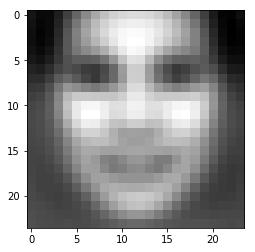

In [9]:
# Load face dataset
X = np.genfromtxt("data/faces.txt",delimiter=None)

# Remove the mean
mu = np.mean(X, axis = 0) #find mean face
X0 = X - mu #subtract mean face

# Plot the mean face
plt.figure()
mean_face = np.reshape(mu, (24,24))
plt.imshow(mean_face.T, cmap="gray")

### 2.2 (10 points)

In [10]:
from scipy import linalg as la

U, S, V = la.svd(X0, full_matrices = False)
W = U.dot(np.diag(S))
print("W's Shape:", W.shape)
print("Vh's Shape: ", V.shape)

W's Shape: (4916, 576)
Vh's Shape:  (576, 576)


### 2.3 (10 points)

(0, 10, 0, 3000)

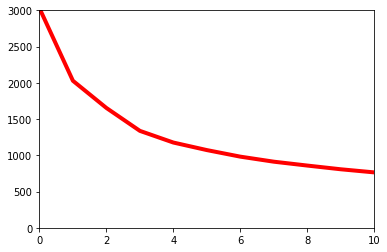

In [11]:
errors = []

for K in range(11):
    X0_hat = np.dot(W[:,:K], V[:K,:])
    errors.append(np.mean((X0 - X0_hat) ** 2)) #mse between X0 and X0_hat
    
plt.plot(range(11),errors,'r-',linewidth=4)
plt.axis((0,10,0,3000))

### 2.4 (15 points)

<Figure size 432x288 with 0 Axes>

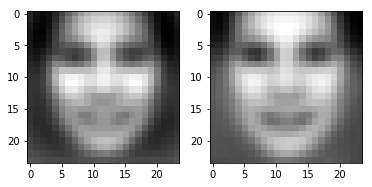

<Figure size 432x288 with 0 Axes>

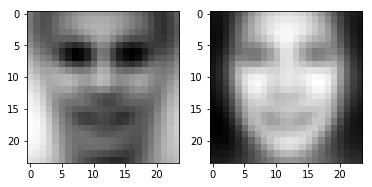

<Figure size 432x288 with 0 Axes>

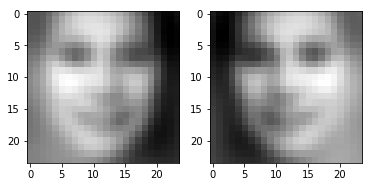

In [12]:
for k in range(3):
    alpha = 2*np.median(np.abs( W[:,k])) #scaler
    im1 = mu + alpha * V[k,:] #add PC to the mean
    im2 = mu - alpha * V[k,:] #subtract PC to the mean

    img1 = np.reshape(im1,(24,24))
    img2 = np.reshape(im2,(24,24))
    
    plt.figure()
    f,(ax1,ax2) = plt.subplots(1,2)
    ax1.imshow(img1.T, cmap="gray")
    ax2.imshow(img2.T, cmap="gray")

### 2.5 (10 points)

<Figure size 432x288 with 0 Axes>

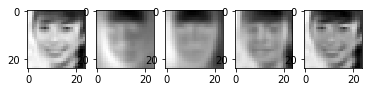

<Figure size 432x288 with 0 Axes>

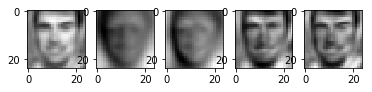

In [14]:
# Reconstruct two faces using a few components
for i in [24,35]:
    im = X[i,:]
    im = np.reshape(im, (24,24))
    plt.figure()
    f,ax = plt.subplots(1,5)
    ax[0].imshow(im.T, cmap="gray") #show original image
    
    for j,k in enumerate([5,10,50,100]):
        X0_hat = W[:,:k].dot(V[:k,:])
        im = X0_hat[i,:] #reconstruct using k principal components
        img = np.reshape(im,(24,24)) #reshape im to 24x24
        ax[j+1].imshow(img.T, cmap="gray")

### 2.6 (15 points)

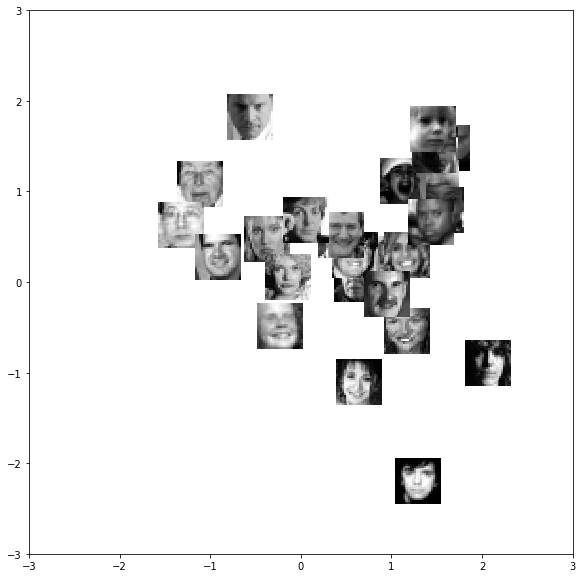

In [142]:
idx = np.random.choice(X.shape[0], size = 25)# sample 25 images without replacement using np.random.choice
coord = StandardScaler().fit_transform(W[:, :2])
plt.figure(figsize = (10, 10))
for i in idx:
    loc = (coord[i,0], coord[i,0] + 0.5, coord[i,1], coord[i,1] + 0.5) # compute where to place image (scaled W values) & size
    img = np.reshape(X[i,:], (24,24)) # reshape to square
    plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image
    plt.axis( (-3,3,-3,3) ) # set axis to a reasonable scale

## Problem 3: Statement of Collaboration (5 points)

The homework was done individually and without any discussion. However, I was able to get help to most of the problems I was facing through browsing Piazza as many questions I had were answered on the forum. I also received help from going to the discussion section as well as the discussion slides and lecture notes to get me started on the homework problems.